# Fruit Classification

In [9]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## Đọc dữ liệu từ folder data

In [8]:
def load_dataset(folder_path, img_size=(32, 32), has_labels=True):
    images = []
    labels = []

    if has_labels:
        for class_name in os.listdir(folder_path):
            class_path = os.path.join(folder_path, class_name)
            if os.path.isdir(class_path):
                for img_file in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_file)
                    try:
                        # Mở và resize ảnh
                        img = Image.open(img_path).convert('RGB')
                        img = img.resize(img_size)
                        # Chuyển thành mảng và flatten
                        img_array = np.array(img).flatten()
                        images.append(img_array)
                        labels.append(class_name)
                    except Exception as e:
                        print(f"Lỗi khi đọc ảnh {img_path}: {str(e)}")
    else:  # For predict folder without labels
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            try:
                # Mở và resize ảnh
                img = Image.open(img_path).convert('RGB')
                img = img.resize(img_size)
                # Chuyển thành mảng và flatten
                img_array = np.array(img).flatten()
                images.append(img_array)
            except Exception as e:
                print(f"Lỗi khi đọc ảnh {img_path}: {str(e)}")

    # Return empty arrays if no images were loaded
    if not images:
        return np.empty((0, img_size[0] * img_size[1] * 3)), np.empty(0)

    return np.array(images), np.array(labels)


## Load dữ liệu train, test và predict

In [10]:
train_folder = "D:\\Machine Learning\\Fruit_Classification\\Data\\train"
test_folder = "D:\\Machine Learning\\Fruit_Classification\\Data\\test"
predict_folder = "D:\\Machine Learning\\Fruit_Classification\\Data\\predict"


X_train, y_train = load_dataset(train_folder)
X_test, y_test = load_dataset(test_folder)
X_predict, _ = load_dataset(predict_folder, has_labels=False)

## Tiền xử lý dữ liệu

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_predict = scaler.transform(X_predict)

## K-Nearest Neighbors (K-NN)

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=2) 
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Độ chính xác K-NN: {accuracy_knn}")
print(classification_report(y_test, y_pred_knn))

Độ chính xác K-NN: 0.32390243902439025
              precision    recall  f1-score   support

       apple       0.48      0.80      0.60        89
     avocado       0.26      0.18      0.21       105
      banana       0.26      0.46      0.33       106
      cherry       0.46      0.38      0.42       105
        kiwi       0.24      0.41      0.31       105
       mango       0.25      0.24      0.24       105
      orange       0.36      0.32      0.34        97
  pinenapple       0.38      0.47      0.42       105
 stawberries       0.00      0.00      0.00       103
strawberries       0.00      0.00      0.00         0
  watermelon       0.42      0.05      0.09       105

    accuracy                           0.32      1025
   macro avg       0.28      0.30      0.27      1025
weighted avg       0.31      0.32      0.29      1025



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

## Gaussian Naive Bayes

In [17]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Độ chính xác GaussianNB: {accuracy_nb}")
print(classification_report(y_test, y_pred_nb))

Độ chính xác GaussianNB: 0.22829268292682928
              precision    recall  f1-score   support

       apple       0.12      0.33      0.18        89
     avocado       0.29      0.26      0.27       105
      banana       0.26      0.27      0.26       106
      cherry       0.31      0.29      0.30       105
        kiwi       0.38      0.23      0.29       105
       mango       0.27      0.35      0.31       105
      orange       0.41      0.28      0.33        97
  pinenapple       0.45      0.22      0.29       105
 stawberries       0.00      0.00      0.00       103
strawberries       0.00      0.00      0.00         0
  watermelon       0.33      0.08      0.12       105

    accuracy                           0.23      1025
   macro avg       0.26      0.21      0.21      1025
weighted avg       0.29      0.23      0.24      1025



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

## Logistic Regression

In [18]:
lr_model = LogisticRegression(max_iter=1000)  # Tăng max_iter nếu cần
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Độ chính xác Hồi quy Logistic: {accuracy_lr}")
print(classification_report(y_test, y_pred_lr))

Độ chính xác Hồi quy Logistic: 0.32390243902439025
              precision    recall  f1-score   support

       apple       0.40      0.66      0.50        89
     avocado       0.29      0.19      0.23       105
      banana       0.29      0.28      0.28       106
      cherry       0.46      0.32      0.38       105
        kiwi       0.29      0.31      0.30       105
       mango       0.26      0.25      0.25       105
      orange       0.33      0.35      0.34        97
  pinenapple       0.58      0.76      0.66       105
 stawberries       0.00      0.00      0.00       103
strawberries       0.00      0.00      0.00         0
  watermelon       0.14      0.15      0.15       105

    accuracy                           0.32      1025
   macro avg       0.28      0.30      0.28      1025
weighted avg       0.30      0.32      0.31      1025



C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

Dựa vào kết quả, mô hình K-NN và Hồi quy Logistic đều đạt độ chính xác khoảng 32%, trong khi GaussianNB thấp hơn với khoảng 23%. 

Cả ba mô hình đều gặp khó khăn với một số lớp như "stawberries" và "strawberries" (precision, recall đều bằng 0), cho thấy dữ liệu có thể mất cân bằng hoặc ảnh chưa đủ đặc trưng để phân biệt tốt. K-NN và Hồi quy Logistic có hiệu suất tương đương, nhưng K-NN có recall cao hơn ở một số lớp như "apple". GaussianNB không phù hợp với dữ liệu ảnh nhiều chiều như thế này. 

Do đó, nên ưu tiên sử dụng K-NN hoặc Hồi quy Logistic

## Cải thiện mô hình

### Cải thiện data

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import time
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

In [20]:
def balance_dataset(X, y, random_state=42):
    # Get class counts
    classes, counts = np.unique(y, return_counts=True)
    max_samples = max(counts)
    
    # Create balanced dataset
    X_balanced = []
    y_balanced = []
    
    for cls in classes:
        # Get indices for this class
        indices = np.where(y == cls)[0]
        X_cls = X[indices]
        y_cls = y[indices]
        
        # If class has fewer samples than max_samples, oversample
        if len(indices) < max_samples:
            X_resampled, y_resampled = resample(X_cls, y_cls, 
                                               replace=True, 
                                               n_samples=max_samples,
                                               random_state=random_state)
            X_balanced.append(X_resampled)
            y_balanced.append(y_resampled)
        else:
            # If class has more samples, just take the first max_samples
            X_balanced.append(X_cls[:max_samples])
            y_balanced.append(y_cls[:max_samples])
    
    # Concatenate all balanced classes
    X_balanced = np.vstack(X_balanced)
    y_balanced = np.concatenate(y_balanced)
    
    return X_balanced, y_balanced


In [21]:
# Function to apply dimensionality reduction
def apply_dimensionality_reduction(X_train, X_test, y_train, method='pca', n_components=50):
    if method.lower() == 'pca':
        reducer = PCA(n_components=n_components, random_state=42)
        X_train_reduced = reducer.fit_transform(X_train)
        X_test_reduced = reducer.transform(X_test)
        
        # Calculate explained variance
        explained_variance = sum(reducer.explained_variance_ratio_) * 100
        print(f"Explained variance with {n_components} components: {explained_variance:.2f}%")
    
    elif method.lower() == 'lda':
        # LDA requires labels and can only create n_classes-1 components
        n_classes = len(np.unique(y_train))
        n_components = min(n_components, n_classes-1)
        reducer = LDA(n_components=n_components)
        X_train_reduced = reducer.fit_transform(X_train, y_train)
        X_test_reduced = reducer.transform(X_test)
        print(f"Using LDA with {n_components} components")
    
    else:
        raise ValueError("Method must be 'pca' or 'lda'")
    
    return X_train_reduced, X_test_reduced, reducer


In [22]:
# Enhanced load_dataset function with standardization option
def load_dataset_enhanced(folder_path, img_size=(32, 32), has_labels=True, standardize=True):
    images = []
    labels = []
    
    if has_labels:
        for class_name in os.listdir(folder_path):
            class_path = os.path.join(folder_path, class_name)
            if os.path.isdir(class_path):
                for img_file in os.listdir(class_path):
                    img_path = os.path.join(class_path, img_file)
                    try:
                        # Open and resize image
                        img = Image.open(img_path).convert('RGB')
                        img = img.resize(img_size)
                        # Convert to array and flatten
                        img_array = np.array(img).flatten()
                        
                        # Standardize pixel values to [0,1] if requested
                        if standardize:
                            img_array = img_array / 255.0
                            
                        images.append(img_array)
                        labels.append(class_name)
                    except Exception as e:
                        print(f"Error reading image {img_path}: {str(e)}")
    else:  # For predict folder without labels
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            try:
                # Open and resize image
                img = Image.open(img_path).convert('RGB')
                img = img.resize(img_size)
                # Convert to array and flatten
                img_array = np.array(img).flatten()
                
                # Standardize pixel values to [0,1] if requested
                if standardize:
                    img_array = img_array / 255.0
                    
                images.append(img_array)
            except Exception as e:
                print(f"Error reading image {img_path}: {str(e)}")

    # Return empty arrays if no images were loaded
    if not images:
        return np.empty((0, img_size[0] * img_size[1] * 3)), np.empty(0)

    return np.array(images), np.array(labels)

### Load and preprocess data with enhanced features

In [24]:
train_folder = "D:\\Machine Learning\\Fruit_Classification\\Data\\train"
test_folder = "D:\\Machine Learning\\Fruit_Classification\\Data\\test"
predict_folder = "D:\\Machine Learning\\Fruit_Classification\\Data\\predict"


In [ ]:
X_train, y_train = load_dataset_enhanced(train_folder, img_size=(64, 64), standardize=True)
print(f"Loaded {len(X)} images from training folder")
print(f"Feature vector shape: {X[0].shape}")


X_test, y_test = load_dataset_enhanced(test_folder, img_size=(64, 64), standardize=True)
print(f"Loaded {len(X)} images from testing folder")
print(f"Feature vector shape: {X[0].shape}")



Loaded 2301 images from training folder
Feature vector shape: (12288,)
Loaded 2301 images from testing folder
Feature vector shape: (12288,)


### Encode labels

In [32]:
from sklearn.preprocessing import LabelEncoder
label_train_encoder = LabelEncoder()
y_train_encoded = label_train_encoder.fit_transform(y_train)
print(f"Classes: {label_train_encoder.classes_}")

label_test_encoder = LabelEncoder()
y_test_encoded = label_test_encoder.fit_transform(y_test)
print(f"Classes: {label_train_encoder.classes_}")


Classes: ['apple' 'avocado' 'banana' 'cherry' 'kiwi' 'mango' 'orange' 'pinenapple'
 'strawberries' 'watermelon']
Classes: ['apple' 'avocado' 'banana' 'cherry' 'kiwi' 'mango' 'orange' 'pinenapple'
 'strawberries' 'watermelon']


### Balance the training dataset

In [33]:
X_train_balanced, y_train_balanced = balance_dataset(X_train, y_train)
print(f"Balanced training set: {X_train_balanced.shape[0]} samples")

Balanced training set: 2310 samples


### Balance the testing dataset

In [34]:
X_test_balanced, y_test_balanced = balance_dataset(X_test, y_test)
print(f"Balanced training set: {X_train_balanced.shape[0]} samples")

Balanced training set: 2310 samples


### Apply dimensionality reduction (try both PCA and LDA)

#### PCA approach

In [37]:
X_train_pca, X_test_pca, pca = apply_dimensionality_reduction(X_train_balanced, X_test, y_train_balanced
, method='pca', n_components=100)

Explained variance with 100 components: 85.12%


#### LDA approach

In [35]:
X_train_lda, X_test_lda, lda = apply_dimensionality_reduction(X_train_balanced, X_test, y_train_balanced
, method='lda')

Using LDA with 9 components


### Standardize features (important for many models)

In [38]:
scaler = StandardScaler()
X_train_pca_scaled = scaler.fit_transform(X_train_pca)
X_test_pca_scaled = scaler.transform(X_test_pca)

### Function to train and evaluate models with hyperparameter tuning

In [39]:
def train_and_evaluate_models(X_train, y_train, X_test, y_test, reduction_method='PCA'):
    results = {}
    
    # 1. K-Nearest Neighbors with hyperparameter tuning
    print(f"\nTraining KNN model with {reduction_method}...")
    knn_params = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    knn = KNeighborsClassifier()
    knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
    start_time = time.time()
    knn_grid.fit(X_train, y_train)
    knn_time = time.time() - start_time
    
    best_knn = knn_grid.best_estimator_
    y_pred_knn = best_knn.predict(X_test)
    knn_accuracy = accuracy_score(y_test, y_pred_knn)
    
    print(f"Best KNN parameters: {knn_grid.best_params_}")
    print(f"KNN Accuracy: {knn_accuracy:.4f}")
    print(f"Training time: {knn_time:.2f} seconds")
    
    results['knn'] = {
        'model': best_knn,
        'accuracy': knn_accuracy,
        'time': knn_time,
        'best_params': knn_grid.best_params_
    }
    
    # 2. Logistic Regression with hyperparameter tuning
    print(f"\nTraining Logistic Regression model with {reduction_method}...")
    lr_params = {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000]
    }
    lr = LogisticRegression(random_state=42)
    lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
    start_time = time.time()
    lr_grid.fit(X_train, y_train)
    lr_time = time.time() - start_time
    
    best_lr = lr_grid.best_estimator_
    y_pred_lr = best_lr.predict(X_test)
    lr_accuracy = accuracy_score(y_test, y_pred_lr)
    
    print(f"Best Logistic Regression parameters: {lr_grid.best_params_}")
    print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
    print(f"Training time: {lr_time:.2f} seconds")
    
    results['lr'] = {
        'model': best_lr,
        'accuracy': lr_accuracy,
        'time': lr_time,
        'best_params': lr_grid.best_params_
    }
    
    # 3. Gaussian Naive Bayes
    print(f"\nTraining Gaussian Naive Bayes model with {reduction_method}...")
    gnb = GaussianNB()
    start_time = time.time()
    gnb.fit(X_train, y_train)
    gnb_time = time.time() - start_time
    
    y_pred_gnb = gnb.predict(X_test)
    gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
    
    print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy:.4f}")
    print(f"Training time: {gnb_time:.2f} seconds")
    
    results['gnb'] = {
        'model': gnb,
        'accuracy': gnb_accuracy,
        'time': gnb_time
    }
    
    return results

### Train and evaluate models with PCA

In [40]:
pca_results = train_and_evaluate_models(X_train_pca_scaled, y_train_balanced, 
                                       X_test_pca_scaled, y_test, 'PCA')


Training KNN model with PCA...


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Best KNN parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.2605
Training time: 1.37 seconds

Training Logistic Regression model with PCA...


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Logistic Regression parameters: {'C': 100, 'max_iter': 1000, 'solver': 'saga'}
Logistic Regression Accuracy: 0.3249
Training time: 47.27 seconds

Training Gaussian Naive Bayes model with PCA...
Gaussian Naive Bayes Accuracy: 0.2537
Training time: 0.01 seconds


### Train and evaluate models with LDA

In [41]:
lda_results = train_and_evaluate_models(X_train_lda, y_train_balanced, 
                                       X_test_lda, y_test, 'LDA')


Training KNN model with LDA...
Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
KNN Accuracy: 0.1922
Training time: 1.62 seconds

Training Logistic Regression model with LDA...


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_sag.py:348: Conve

Best Logistic Regression parameters: {'C': 1, 'max_iter': 1000, 'solver': 'saga'}
Logistic Regression Accuracy: 0.2000
Training time: 18.45 seconds

Training Gaussian Naive Bayes model with LDA...
Gaussian Naive Bayes Accuracy: 0.1795
Training time: 0.00 seconds


## Visualization and Comparison of Results

In [42]:
print("\n--- Model Performance Comparison ---")
print("PCA-based models:")
for model_name, result in pca_results.items():
    print(f"PCA-{model_name.upper()}: Accuracy = {result['accuracy']:.4f}, Training Time = {result['time']:.2f}s")

print("\nLDA-based models:")
for model_name, result in lda_results.items():
    print(f"LDA-{model_name.upper()}: Accuracy = {result['accuracy']:.4f}, Training Time = {result['time']:.2f}s")


--- Model Performance Comparison ---
PCA-based models:
PCA-KNN: Accuracy = 0.2605, Training Time = 1.37s
PCA-LR: Accuracy = 0.3249, Training Time = 47.27s
PCA-GNB: Accuracy = 0.2537, Training Time = 0.01s

LDA-based models:
LDA-KNN: Accuracy = 0.1922, Training Time = 1.62s
LDA-LR: Accuracy = 0.2000, Training Time = 18.45s
LDA-GNB: Accuracy = 0.1795, Training Time = 0.00s


### Visualize results

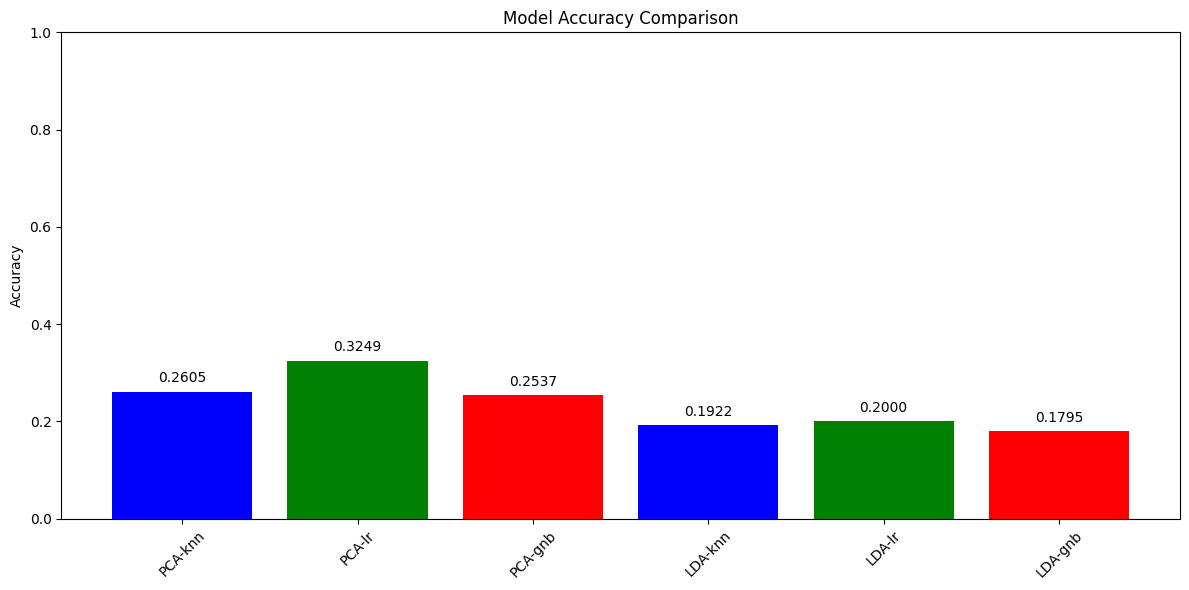

In [43]:
plt.figure(figsize=(12, 6))

# PCA results
pca_accuracies = [result['accuracy'] for result in pca_results.values()]
pca_model_names = [f"PCA-{name}" for name in pca_results.keys()]

# LDA results
lda_accuracies = [result['accuracy'] for result in lda_results.values()]
lda_model_names = [f"LDA-{name}" for name in lda_results.keys()]

# Combine results
all_model_names = pca_model_names + lda_model_names
all_accuracies = pca_accuracies + lda_accuracies
colors = ['blue', 'green', 'red'] * 2

plt.bar(all_model_names, all_accuracies, color=colors)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
for i, v in enumerate(all_accuracies):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center')
plt.tight_layout()
plt.show()

### Visualize confusion matrices for best models

In [47]:
def plot_confusion_matrix(model, X_test, y_test, class_names, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Get the unique classes actually present in the test data
    unique_classes = np.unique(np.concatenate([y_test, y_pred]))
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
    
    print(f"\nClassification Report for {title}:")
    # Pass the labels parameter to ensure correct mapping
    print(classification_report(y_test, y_pred, labels=range(len(class_names)), target_names=class_names))

# Find best model from PCA results
best_pca_model_name = max(pca_results, key=lambda k: pca_results[k]['accuracy'])
best_pca_model = pca_results[best_pca_model_name]['model']
print(f"\nBest PCA model: {best_pca_model_name.upper()} with accuracy {pca_results[best_pca_model_name]['accuracy']:.4f}")

# Find best model from LDA results
best_lda_model_name = max(lda_results, key=lambda k: lda_results[k]['accuracy'])
best_lda_model = lda_results[best_lda_model_name]['model']
print(f"Best LDA model: {best_lda_model_name.upper()} with accuracy {lda_results[best_lda_model_name]['accuracy']:.4f}")


Best PCA model: LR with accuracy 0.3249
Best LDA model: LR with accuracy 0.2000


In [45]:
def predict_images(model, predict_folder, label_encoder, img_size=(64, 64), 
                  standardize=True, reducer=None, scaler=None, reduction_method='PCA'):
    # Load prediction images
    X_pred, _ = load_dataset_enhanced(predict_folder, img_size=img_size, 
                                     has_labels=False, standardize=standardize)
    
    if len(X_pred) == 0:
        print("No images found in the prediction folder!")
        return [], []
    
    # Apply same transformations as training data
    if reducer is not None:
        X_pred = reducer.transform(X_pred)
    
    if scaler is not None:
        X_pred = scaler.transform(X_pred)
    
    # Make predictions
    y_pred = model.predict(X_pred)
    
    # Get class names
    predicted_classes = label_encoder.inverse_transform(y_pred)
    
    # Get filenames
    filenames = [f for f in os.listdir(predict_folder) 
                if os.path.isfile(os.path.join(predict_folder, f))]
    
    print(f"\nPredictions using {reduction_method} model:")
    for filename, predicted_class in zip(filenames, predicted_classes):
        print(f"Image: {filename} → Predicted: {predicted_class}")
    
    return predicted_classes, filenames


In [46]:
predict_folder = "D:\\Machine Learning\\Fruit_Classification\\Data\\predict"

# Predict with best PCA model
pca_predictions, pca_filenames = predict_images(
    best_pca_model, predict_folder, label_encoder, 
    img_size=(64, 64), standardize=True, reducer=pca, scaler=scaler, reduction_method='PCA')

# Predict with best LDA model
lda_predictions, lda_filenames = predict_images(
    best_lda_model, predict_folder, label_encoder, 
    img_size=(64, 64), standardize=True, reducer=lda, reduction_method='LDA')

ValueError: y contains previously unseen labels: ['apple' 'avocado' 'banana' 'cherry' 'kiwi' 'mango' 'orange' 'pinenapple'
 'strawberries' 'watermelon']